# Libraries & Settings

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
print(pd.__version__)
print(np.version.version)
print(sys.version)

1.0.5
1.18.5
3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [3]:
mpl.matplotlib_fname()
plt.rc('font', size=15)        # basic fond
plt.rc('axes', labelsize=25)   # x/y labels
plt.rc('xtick', labelsize=20)  # x-axis grid
plt.rc('ytick', labelsize=20)  # y-axis grid
plt.rc('legend', fontsize=15) 
plt.rc('figure', titlesize=20)

# Acquire Data

In [4]:
df_test = pd.read_csv("./Data/test.csv")
df_train = pd.read_csv("./Data/train.csv")

In [5]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Comparing Columns

In [6]:
df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
# find different column
train_columns = pd.DataFrame({"Diff_Column": df_train.columns,
                            "train_data" : range(len(df_train.columns.tolist()))})

test_columns = pd.DataFrame({'Diff_Column': df_test.columns, 
                             'test_data': range(len(df_test.columns.tolist()))})

col_merged = pd.merge(train_columns, test_columns, on = 'Diff_Column', how = 'left') # compare by column name

diff_columns = []
for i in col_merged[col_merged.isnull().any(axis = 1)]['Diff_Column']:
    diff_columns.append(i)

In [8]:
# Change Column

re_index = list(df_test.columns)

for col in df_train.columns:
    if col in diff_columns :
        re_index.append(col)
        
df_train = df_train.reindex(columns = re_index)


In [9]:
df_train.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [10]:
train_info = pd.DataFrame(zip(df_train.columns, df_train.count(),df_train.nunique(), df_train.dtypes))
train_info.columns = ['Column', 'Count', 'Unique', 'Dtype']
test_info = pd.DataFrame(zip(df_test.columns, df_test.count(), df_test.nunique(), df_test.dtypes))
test_info.columns = ['Column', 'Count', 'Unique', 'Dtype']
pd.concat([train_info, test_info], axis = 1, join ='outer',
          keys = ['train info','test info'])#.reindex=[train_info.index]

train info                          test info                       
         Column Count Unique    Dtype       Column  Count Unique    Dtype
0   PassengerId   891    891    int64  PassengerId  418.0  418.0    int64
1        Pclass   891      3    int64       Pclass  418.0    3.0    int64
2          Name   891    891   object         Name  418.0  418.0   object
3           Sex   891      2   object          Sex  418.0    2.0   object
4           Age   714     88  float64          Age  332.0   79.0  float64
5         SibSp   891      7    int64        SibSp  418.0    7.0    int64
6         Parch   891      7    int64        Parch  418.0    8.0    int64
7        Ticket   891    681   object       Ticket  418.0  363.0   object
8          Fare   891    248  float64         Fare  417.0  169.0  float64
9         Cabin   204    147   object        Cabin   91.0   76.0   object
10     Embarked   889      3   object     Embarked  418.0    3.0   object
11     Survived   891      2    int64          NaN    NaN    NaN      NaN

# Data Processing

### Categorization

In [11]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [12]:
df_train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ponesell, Mr. Martin",male,347082,G6,S
freq,1,577,7,4,644


In [13]:
train_visual = df_train.select_dtypes(
                     include = ['object', 'category']).columns.tolist()
train_visual

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [14]:
uniques = {col: pd.DataFrame(df_test[col].value_counts()) 
              for col in list(df_test.columns)}

In [15]:
uniques

{'PassengerId':       PassengerId
 1023            1
 1128            1
 1156            1
 1157            1
 1158            1
 ...           ...
 1305            1
 1306            1
 1307            1
 1308            1
 1024            1
 
 [418 rows x 1 columns],
 'Pclass':    Pclass
 3     218
 1     107
 2      93,
 'Name':                                                  Name
 McCrae, Mr. Arthur Gordon                           1
 McCoy, Miss. Alicia                                 1
 Wheeler, Mr. Edwin Frederick""                      1
 Pallas y Castello, Mr. Emilio                       1
 Wittevrongel, Mr. Camille                           1
 ...                                               ...
 Willard, Miss. Constance                            1
 Abrahamsson, Mr. Abraham August Johannes            1
 Chapman, Mrs. John Henry (Sara Elizabeth Lawry)     1
 Swane, Mr. George                                   1
 Ryerson, Mr. Arthur Larned                          1
 
 [418

In [16]:
category_list = []
# categorization SibSp, Parch
for i in uniques :
    if len(uniques[i]) <= 10: category_list.append(i) 

In [17]:
category_list

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [18]:
for col in category_list :
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

In [19]:
def transform_index(data, columns) :
    for col in columns :
        cnt = 0
        dicts = dict()
        cols = data[col]
        for idx in range(len(data[col])):
            if data[col][idx] in dicts : continue
            dicts[data[col][idx]] = cnt
            cnt += 1
        data.drop(col,axis=1,inplace=True)
        lists = []
        for i in range(len(cols)):
            lists.append(dicts[cols[i]])
        data[col] = lists


In [20]:
transform_index(df_train,category_list)
transform_index(df_test,category_list)

## Missing Value

In [21]:
round((df_train.isnull().sum()/len(df_train)*100).sort_values(ascending=False),1)

Cabin          77.1
Age            19.9
Embarked        0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Pclass          0.0
Survived        0.0
Fare            0.0
Ticket          0.0
Name            0.0
PassengerId     0.0
dtype: float64

In [22]:
round((df_test.isnull().sum()/len(df_test)*100).sort_values(ascending=False),1)

Cabin          78.2
Age            20.6
Fare            0.2
Embarked        0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Pclass          0.0
Ticket          0.0
Name            0.0
PassengerId     0.0
dtype: float64

### Cabin

In [23]:
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)

### Age

In [24]:
def sub_plots(x_list, y_val, df):
    if len(x_list) < 5 : rows, cols = 2,2
    else : rows, cols = 2, 3
    
    figure, axes = plt.subplots(nrows=rows, ncols=cols)
    figure.set_size_inches(20,12)
    idx = 0
    for i in range(rows):
        for j in range(cols):
            sns.barplot(data=df, x=x_list[idx], y=y_val, ax=axes[i][j])
            idx += 1
            if idx == len(x_list) : return

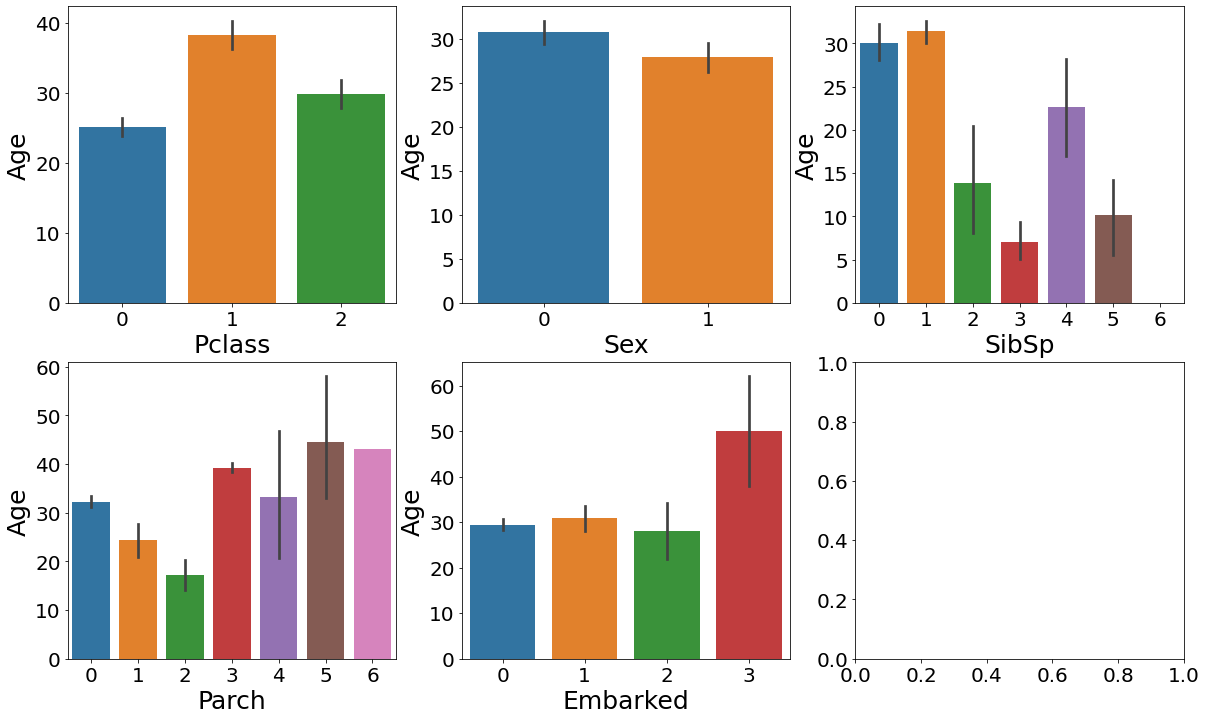

In [25]:
sub_plots(category_list,"Age",df_train)

In [26]:
#PClass / Sex

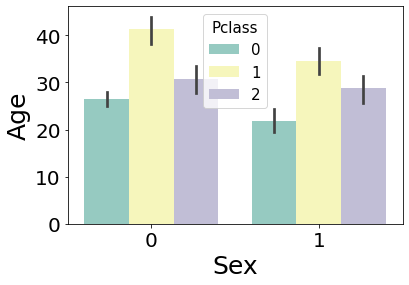

In [27]:
sns.barplot(x = 'Sex', y = 'Age',data=df_train,
            hue='Pclass', palette='Set3')

In [28]:
Age_count = pd.DataFrame({'count': df_train.groupby(['Pclass', 'Sex']).size()})

Age_mean_std = round(pd.pivot_table(df_train, 
                              index = ['Pclass', 'Sex'], 
                              values = 'Age', aggfunc = (np.mean, np.std)), 0)

Age_count.join(Age_mean_std, how = 'outer')

count  mean   std
Pclass Sex                   
0      0      347  27.0  12.0
       1      144  22.0  13.0
1      0      122  41.0  15.0
       1       94  35.0  14.0
2      0      108  31.0  15.0
       1       76  29.0  13.0

In [29]:
def filled_Age_value(data):
    for pclass in [0, 1, 2]:
        for sex in [0, 1]:
            value = data[(data['Pclass']==pclass) & (data['Sex']==sex)]['Age'].median()
            null_list = []
            for index, nan in data[(data['Pclass']==pclass) & (data['Sex']==sex)]['Age'].isnull().items():
                if nan==True:
                    null_list.append(index)
            data.loc[null_list, 'Age'] = value

In [30]:
filled_Age_value(df_train)
filled_Age_value(df_test)

### Embarked

In [31]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Name,Age,Ticket,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked


In [32]:
delete_rows = [61,829]

In [33]:
#df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)
# Just 2 rows
df_train.drop(delete_rows, inplace=True)

In [34]:
df_test[df_test["Embarked"].isnull()]

,PassengerId,Name,Age,Ticket,Fare,Pclass,Sex,SibSp,Parch,Embarked


### Fare

In [35]:
df_train[df_train["Fare"].isnull()]

,PassengerId,Name,Age,Ticket,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked


In [36]:
df_test[df_test["Fare"].isnull()]

,PassengerId,Name,Age,Ticket,Fare,Pclass,Sex,SibSp,Parch,Embarked
152,1044,"Storey, Mr. Thomas",60.5,3701,NaN,0,0,0,0,1


In [37]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)

## EDA

### Heatmap

In [38]:
st = df_train.apply(LabelEncoder().fit_transform)

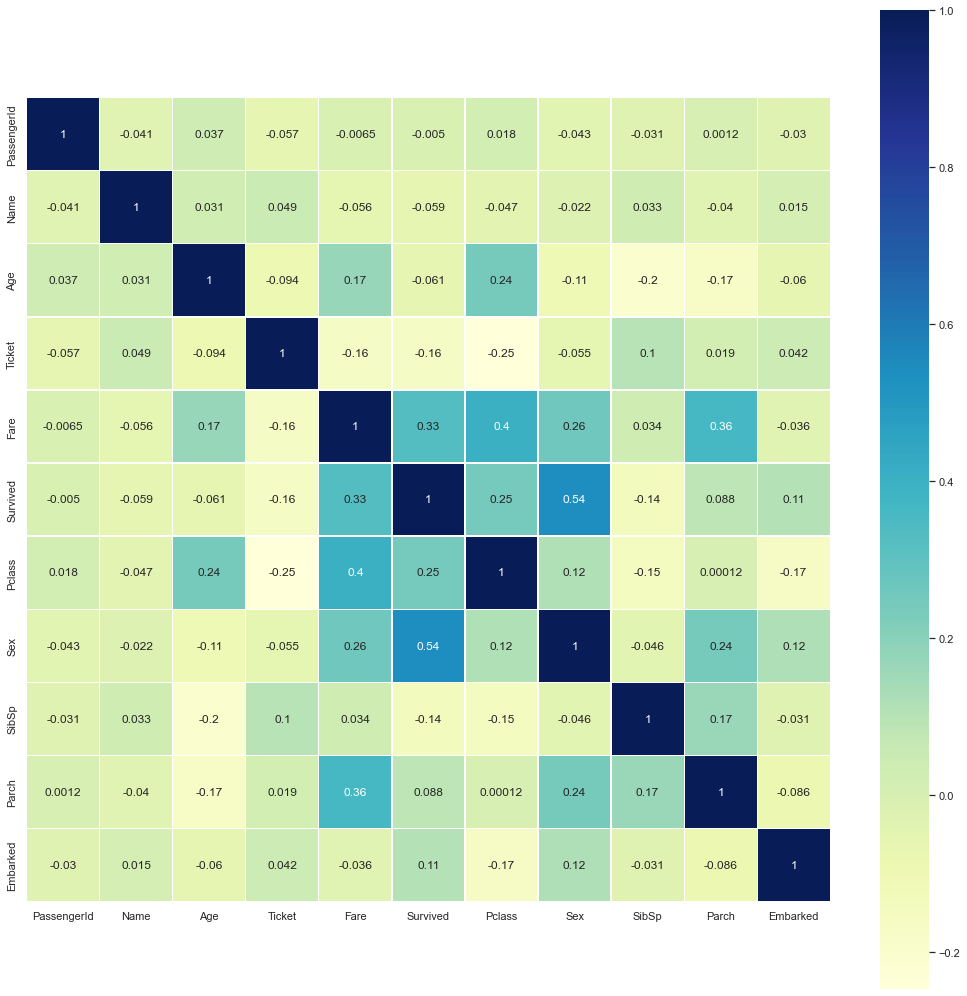

In [39]:
sns.set(color_codes=True)
plt.figure(figsize=(18, 18))

sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu"
           )
plt.show()

### Remove Columns

In [40]:
# PassengerId
df_train.drop('PassengerId', axis = 1, inplace = True)
df_test.drop('PassengerId', axis = 1, inplace = True)
# Name
df_train.drop('Name', axis = 1, inplace = True)
df_test.drop('Name', axis = 1, inplace = True)

In [41]:
eda_columns = df_train.select_dtypes(
                     include = ['int','object', 'category']).columns.tolist()
eda_columns

['Ticket', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [42]:
# delete numeric columns
eda_columns.remove('Ticket')
eda_columns.remove("Survived")

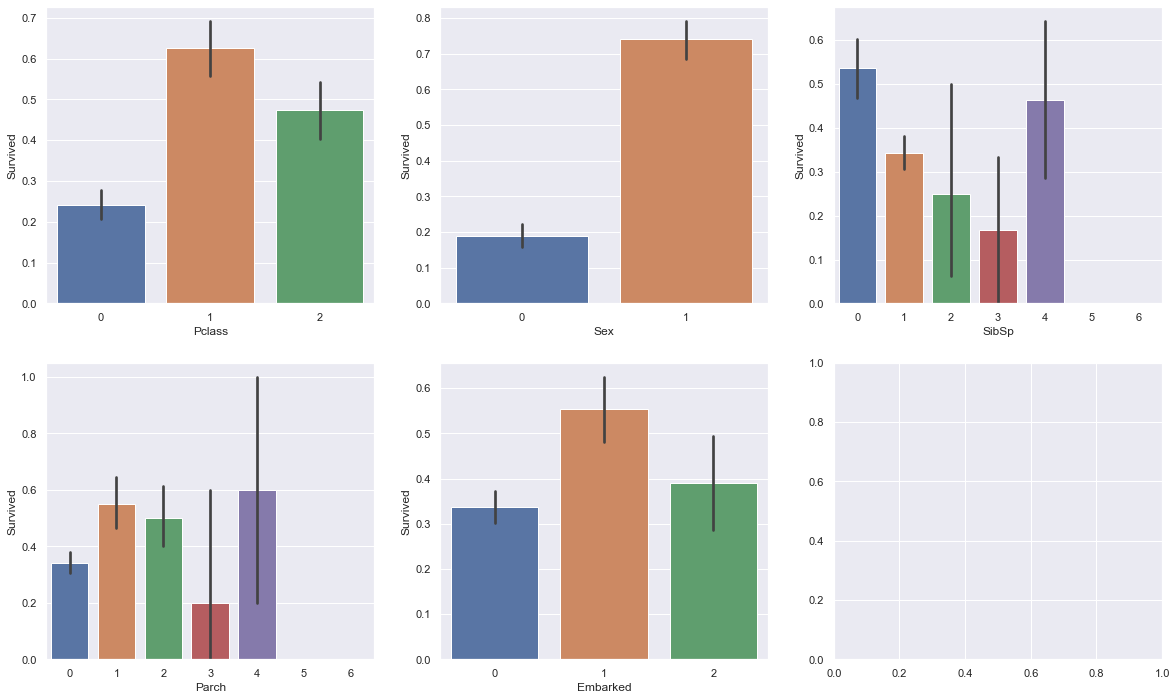

In [43]:
sub_plots(eda_columns,"Survived",df_train)

In [44]:
df_train["Family"] = df_train["SibSp"].astype(int) + df_train["Parch"].astype(int) + 1
df_test["Family"] = df_test["SibSp"].astype(int) + df_test["Parch"].astype(int) + 1

In [45]:
df_train.drop("SibSp",axis=1,inplace=True)
df_test.drop("SibSp",axis=1,inplace=True)
df_train.drop("Parch",axis=1,inplace=True)
df_test.drop("Parch",axis=1,inplace=True)
eda_columns.pop(eda_columns.index("SibSp"))
eda_columns.pop(eda_columns.index("Parch"))
eda_columns.append("Family")

In [46]:
eda_columns

['Pclass', 'Sex', 'Embarked', 'Family']

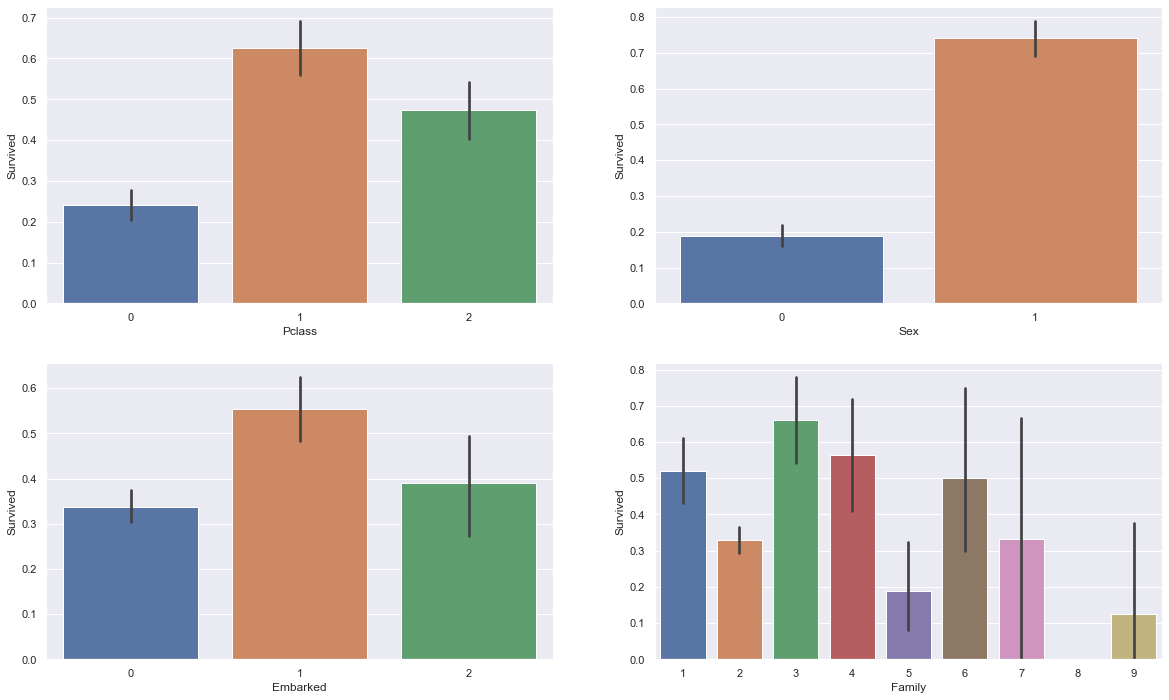

In [47]:
sub_plots(eda_columns,"Survived",df_train)

In [49]:
df_train.head()

,Age,Ticket,Fare,Survived,Pclass,Sex,Embarked,Family
0,22.0,A/5 21171,7.2500,0,0,0,0,1
1,38.0,PC 17599,71.2833,1,1,1,1,1
2,26.0,STON/O2. 3101282,7.9250,1,0,1,0,2
3,35.0,113803,53.1000,1,1,1,0,1
4,35.0,373450,8.0500,0,0,0,0,2
